<a href="https://colab.research.google.com/github/yashveeeer/TSF_TASK/blob/main/GripTask4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRIP @ The Sparks Foundation**

DATA SCIENCE & BUSINESS ANALYTICS

**YASHVEER SINGH**,      OCT2022

# **Task 4 -   Exploratory Data Analysis - Global Terrorism**
*As the Security/Defense Analyst , we have to find out the hot zone of Terrorism and insights out of it.*


**Dataset**- https://bit.ly/2TK5Xn5

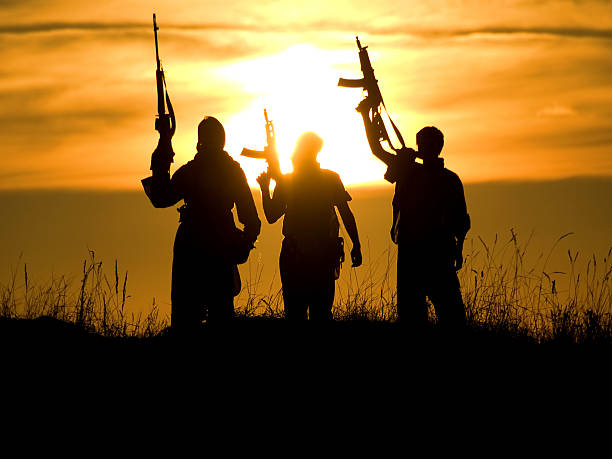

# **Steps:**

* Importing the libraries
* Reading the dataset
* Data Preprocessing
* EDA
* Data Visualization

# **Step 1- Importing the libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline     

import warnings
warnings.filterwarnings('ignore')

# **Step 2- Loading The Data**

In [ ]:
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/globalterrorismdb_0718dist.csv',encoding='latin1')
print("Data have been loaded successfully!!!")

Data have been loaded successfully!!!


# **Step 3- Data Preprocessing**


In [ ]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
print("The Number of rows in the dataset is:",data.shape[0])
print("The Number of columns in the dataset is:",data.shape[1])

The Number of rows in the dataset is: 181691
The Number of columns in the dataset is: 135


In [ ]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
data.duplicated().sum()   
#This shows no duplicated value is there in the given dataset.

0

In [ ]:
#Checking for the columns having null values.
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [ ]:
#As we are not able to view all the column name using the columns function.Thats why we need to do the following.
for i in data.columns:
    print(i,end='\n')

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

# **Step 4- Cleaning the data**


In [ ]:
data=data[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
data.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [ ]:
#We can Rename the columns also , so that it will be easy to access any of the desired column using name defined by us.
data.rename(columns={"iyear":"Year",
                     "imonth":"Month",
                     "iday":"Day",
                     "country_txt":"Country",
                     "region_txt":"Region",
                     "provstate":"Province/State",
                     "city":"City",
                     "latitude":"Latitude",
                     "longitude":"Longitude",
                     "location":"Location",
                     "summary":"Summary",
                     "attacktype1_txt":"Attack Type",
                     "targtype1_txt":"Target Type",
                     "gname":"Group Name",
                     "motive":"Motive",
                     "weaptype1_txt":"Weapon Type",
                     "nkill":"Killed",
                     "nwound":"Wounded",
                     "addnotes":"Add Notes"},inplace=True)

In [ ]:
data.head()


,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [ ]:
#Again
data.shape 

(181691, 19)

In [ ]:
print("The Number of rows in the dataset is:",data.shape[0])
print("The Number of columns in the dataset is:",data.shape[1])

The Number of rows in the dataset is: 181691
The Number of columns in the dataset is: 19


In [ ]:
#Gives all the column names present in the modified variable data.
data.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'Province/State', 'City',
       'Latitude', 'Longitude', 'Location', 'Summary', 'Attack Type',
       'Target Type', 'Group Name', 'Motive', 'Weapon Type', 'Killed',
       'Wounded', 'Add Notes'],
      dtype='object')

In [ ]:
#Gives small description about the variable data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Month           181691 non-null  int64  
 2   Day             181691 non-null  int64  
 3   Country         181691 non-null  object 
 4   Region          181691 non-null  object 
 5   Province/State  181270 non-null  object 
 6   City            181257 non-null  object 
 7   Latitude        177135 non-null  float64
 8   Longitude       177134 non-null  float64
 9   Location        55495 non-null   object 
 10  Summary         115562 non-null  object 
 11  Attack Type     181691 non-null  object 
 12  Target Type     181691 non-null  object 
 13  Group Name      181691 non-null  object 
 14  Motive          50561 non-null   object 
 15  Weapon Type     181691 non-null  object 
 16  Killed          171378 non-null  float64
 17  Wounded   

In [ ]:
#Count of values in each column of the dataset.
data.nunique()

Year                  47
Month                 13
Day                   32
Country              205
Region                12
Province/State      2855
City               36674
Latitude           48322
Longitude          48039
Location           44109
Summary           112492
Attack Type            9
Target Type           22
Group Name          3537
Motive             14490
Weapon Type           12
Killed               205
Wounded              238
Add Notes          15429
dtype: int64

In [ ]:
data.isnull().sum()


Year                   0
Month                  0
Day                    0
Country                0
Region                 0
Province/State       421
City                 434
Latitude            4556
Longitude           4557
Location          126196
Summary            66129
Attack Type            0
Target Type            0
Group Name             0
Motive            131130
Weapon Type            0
Killed             10313
Wounded            16311
Add Notes         153402
dtype: int64

In [ ]:
#No more null values present in these two columns Killed and Wounded.
data["Killed"]=data["Killed"].fillna(0)
data["Wounded"]=data["Wounded"].fillna(0)

In [ ]:
data.isnull().sum()


Year                   0
Month                  0
Day                    0
Country                0
Region                 0
Province/State       421
City                 434
Latitude            4556
Longitude           4557
Location          126196
Summary            66129
Attack Type            0
Target Type            0
Group Name             0
Motive            131130
Weapon Type            0
Killed                 0
Wounded                0
Add Notes         153402
dtype: int64

In [ ]:
#Introducing a new column name Casualty happen as the sum of both Killed and Wounded.
data["Casualty happen"]=data["Killed"]+data["Wounded"]

# Killed , Wounded ,Casualty happen ---> all their values are in booelaen either 0 or 1.

data.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes,Casualty happen
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN,1.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN,1.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,0.0,0.0,NaN,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,0.0,0.0,NaN,0.0


# **Lets look at some numbers..**


In [ ]:
data.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'Province/State', 'City',
       'Latitude', 'Longitude', 'Location', 'Summary', 'Attack Type',
       'Target Type', 'Group Name', 'Motive', 'Weapon Type', 'Killed',
       'Wounded', 'Add Notes', 'Casualty happen'],
      dtype='object')

In [ ]:
#Years in the Dataset.
data['Year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

In [ ]:
#Countries in the Dataset.
data['Country'].unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

In [ ]:
#Check is India there in those above countries...extract its data.
data[data['Country']=='India']

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes,Casualty happen
1186,1972,2,22,India,South Asia,Delhi,New Delhi,28.585836,77.153336,NaN,NaN,Hijacking,Airports & Aircraft,Palestinians,NaN,Explosives,0.0,0.0,NaN,0.0
2764,1975,1,2,India,South Asia,Bihar,Samastipur,25.863042,85.781004,The attack occurred in the town,"1/2/1975: The Indian Railway Minister, Lalit N...",Bombing/Explosion,Government (General),Ananda Marga,Unknown,Explosives,4.0,0.0,The case is very unclear and there are many ru...,4.0
3857,1976,5,26,India,South Asia,Delhi,New Delhi,28.585836,77.153336,NaN,NaN,Bombing/Explosion,Airports & Aircraft,Unknown,NaN,Explosives,0.0,0.0,NaN,0.0
5327,1977,9,28,India,South Asia,Maharashtra,Bombay,19.075984,72.877656,NaN,NaN,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),NaN,Firearms,0.0,0.0,NaN,0.0
7337,1979,1,13,India,South Asia,Assam,Unknown,26.200605,92.937574,NaN,NaN,Armed Assault,Police,Naga People,NaN,Firearms,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181663,2017,12,30,India,South Asia,Kerala,Koothuparamba,11.831902,75.565432,The incident occurred in the Kannur district.,12/30/2017: Assailants threw an explosive devi...,Bombing/Explosion,Police,Unknown,"The specific motive is unknown; however, sourc...",Explosives,0.0,0.0,NaN,0.0
181665,2017,12,30,India,South Asia,Chhattisgarh,Toylanka,18.802725,81.497666,The incident occurred in the Dantewada district.,12/30/2017: Assailants set fire to seven vehic...,Facility/Infrastructure Attack,Business,Communist Party of India - Maoist (CPI-Maoist),"The specific motive is unknown; however, sourc...",Firearms,0.0,0.0,NaN,0.0
181672,2017,12,31,India,South Asia,Jammu and Kashmir,Lethapora,33.966527,74.964225,The incident occurred in the Pulwama district.,12/31/2017: Assailants armed with grenades and...,Armed Assault,Police,Jaish-e-Mohammad (JeM),"The specific motive is unknown; however, sourc...",Explosives,8.0,3.0,"The victims included Kuldip Roy, Taufail Ahmed...",11.0
181684,2017,12,31,India,South Asia,Assam,Hungrum,25.180162,93.015788,The incident occurred in the Dima Hasao distri...,12/31/2017: Assailants abducted Prafulla Phuka...,Hostage Taking (Kidnapping),Government (General),Zeliangrong United Front,NaN,Firearms,0.0,0.0,NaN,0.0


In [ ]:
#Total count of ATTACK TYPE in the Dataset.
data['Attack Type'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack Type, dtype: int64

In [ ]:
#Total count of REGION in the Dataset.
data['Region'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

In [ ]:
#Total count of CITIES in the Dataset.
data['City'].value_counts()

Unknown      9775
Baghdad      7589
Karachi      2652
Lima         2359
Mosul        2265
             ... 
Hotwag          1
Ostend          1
Balughata       1
Jikoyi          1
Kubentog        1
Name: City, Length: 36674, dtype: int64

In [ ]:
#Total count of TARGET TYPE in the Dataset.
data['Target Type'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target Type, dtype: int64

In [ ]:
#Total count of GROUP NAME of terrorists in the Dataset.
data['Group Name'].value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Ansar Sarallah                                          1
Sword of Islam                                          1
Support of Ocalan-The Hawks of Thrace                   1
Arab Revolutionary Front                                1
MANO-D                                                  1
Name: Group Name, Length: 3537, dtype: int64

In [ ]:
#Total count of Weapon Type they have used according to the dataset.
data['Weapon Type'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

In [ ]:
#list of some motives behind the attacks.
pd.DataFrame(data['Motive'].value_counts())

,Motive
Unknown,14889
The specific motive for the attack is unknown.,14430
"The specific motive is unknown; however, sources noted that the attack may have been part of a larger trend of violence related to Bangladesh's nationwide hartal, which began on January 6, 2015.",297
The specific motive for the attack is unknown..,148
The specific motive for the attack is unknown or was not reported.,144
...,...
"Doka Umarov and the Riyadus-Salikhin Battalion of Shakhids claimed responsibility for the attack, via message to the Kavkazcenter website that said the bombing was a planned diversionary act directed against the FSB Academy in Moscow in response to the crimes of the FSB on the territory of the North Caucasus.",1
"The attack was carried out to protest the visit of President of India, Pratibha Devi Singh Patil, to Manipur and also that it was carried out to expose alleged covert agenda of the Central Government to push in non-locals into Manipur. The release also stated that the outfit will carry on with the operation clear cut to drive away foreigners on schedule.",1
Authorities suspect the motive of the attack was extortion related.,1
"The specific motive for the attack is unknown; however, ULFA militants sent an email on 02/19/2011 warning the Congress of dire consequences ahead of the elections for the alleged divisive tactics adopted by the party to divide the ULFA.",1


In [ ]:
#Statistical Summary of Data.
data.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty happen
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


# **Step 5- Visualization of Data**


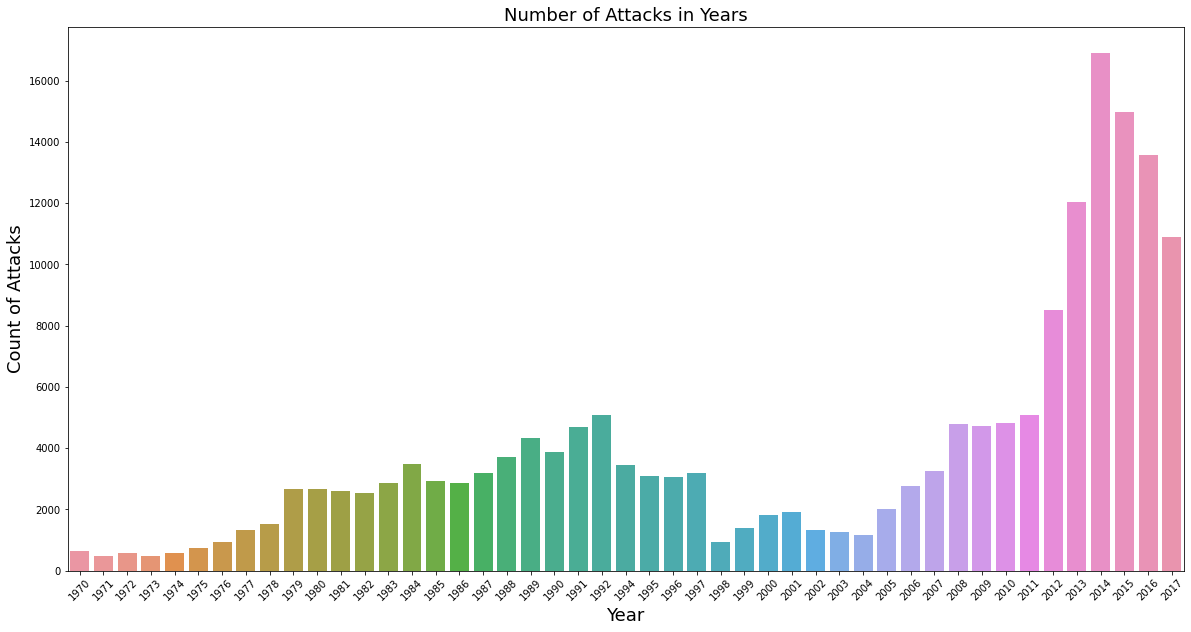

In [ ]:
#Years with Most Terrorist Attacks


plt.figure(figsize=(20,10))
sns.countplot(data['Year'])

plt.title("Number of Attacks in Years",fontsize='18')
plt.xlabel("Year",fontsize='18')
plt.ylabel("Count of Attacks",fontsize='18')
plt.xticks(rotation='45')
plt.show()

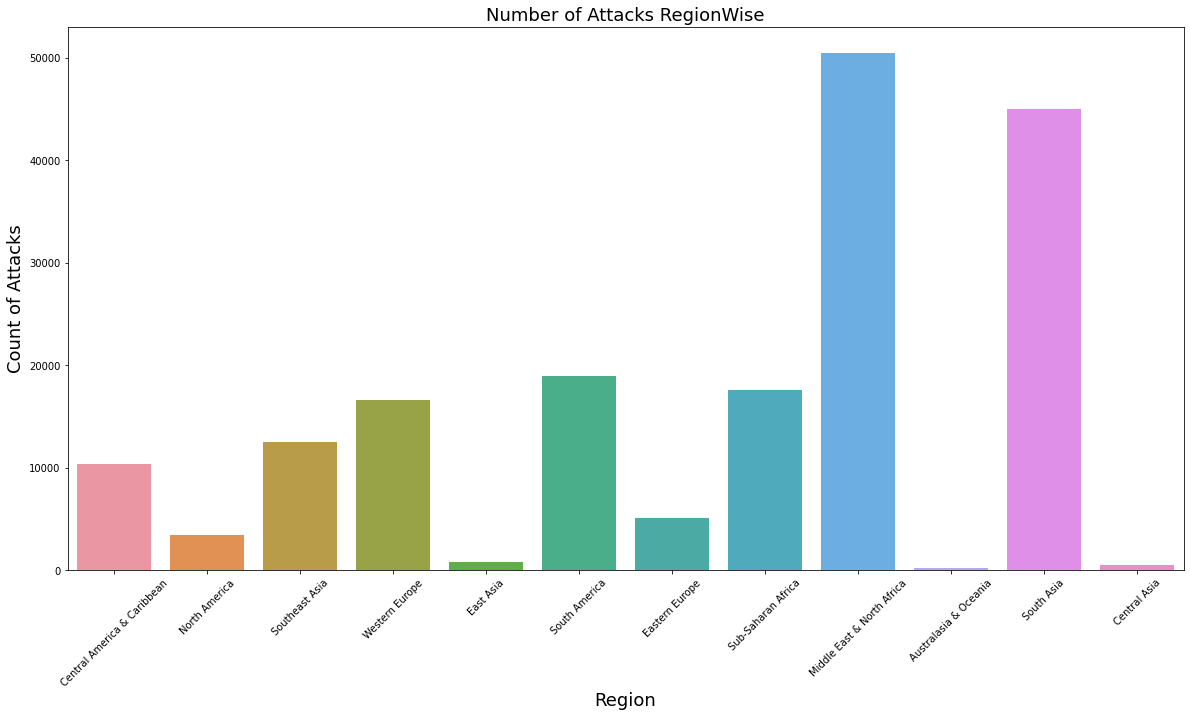

In [ ]:
#Region wise with Most Terrorist Attacks


plt.figure(figsize=(20,10))
sns.countplot(data['Region'])

plt.title("Number of Attacks RegionWise",fontsize='18')
plt.xlabel("Region",fontsize='18')
plt.ylabel("Count of Attacks",fontsize='18')
plt.xticks(rotation='45')
plt.show()

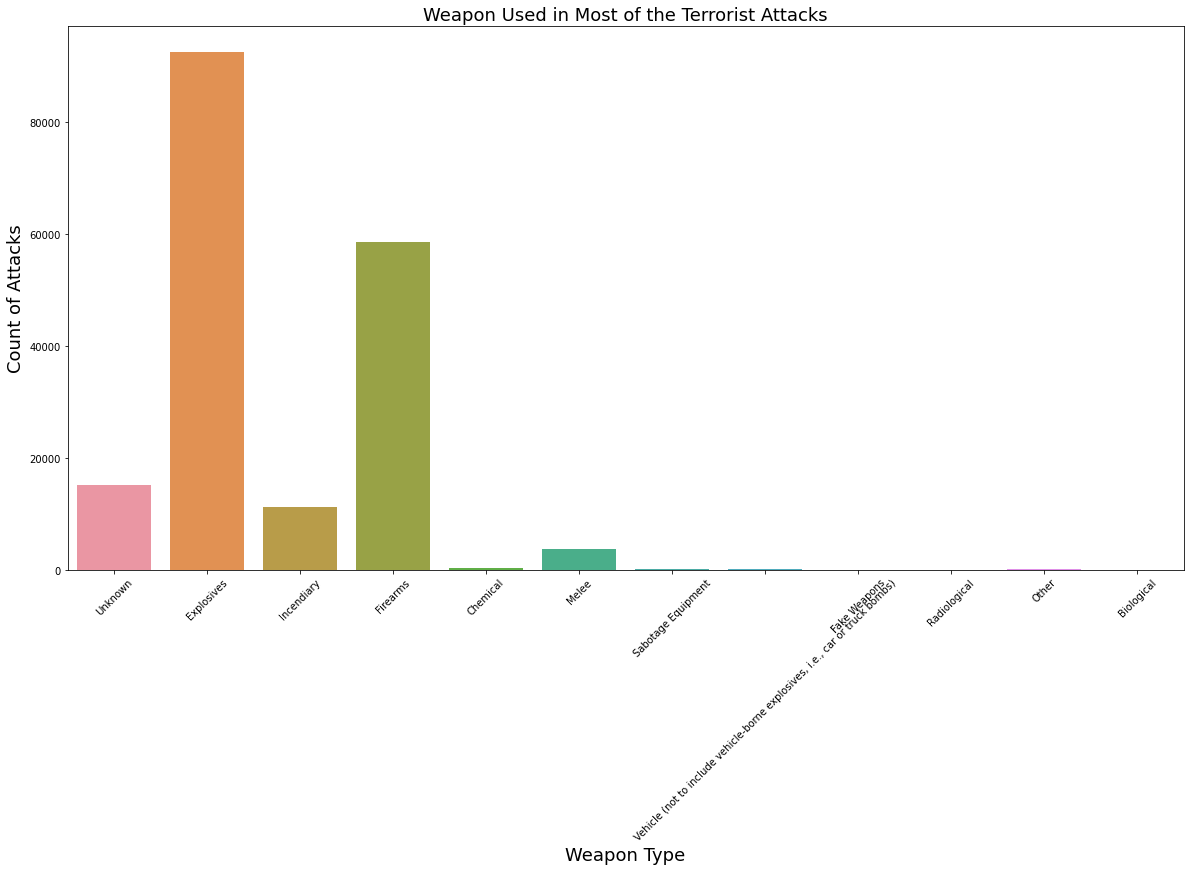

In [ ]:
#Weapon Used in Most of the Terrorist Attacks


plt.figure(figsize=(20,10))
sns.countplot(data['Weapon Type'])

plt.title("Weapon Used in Most of the Terrorist Attacks",fontsize='18')
plt.xlabel("Weapon Type",fontsize='18')
plt.ylabel("Count of Attacks",fontsize='18')
plt.xticks(rotation='45')
plt.show()

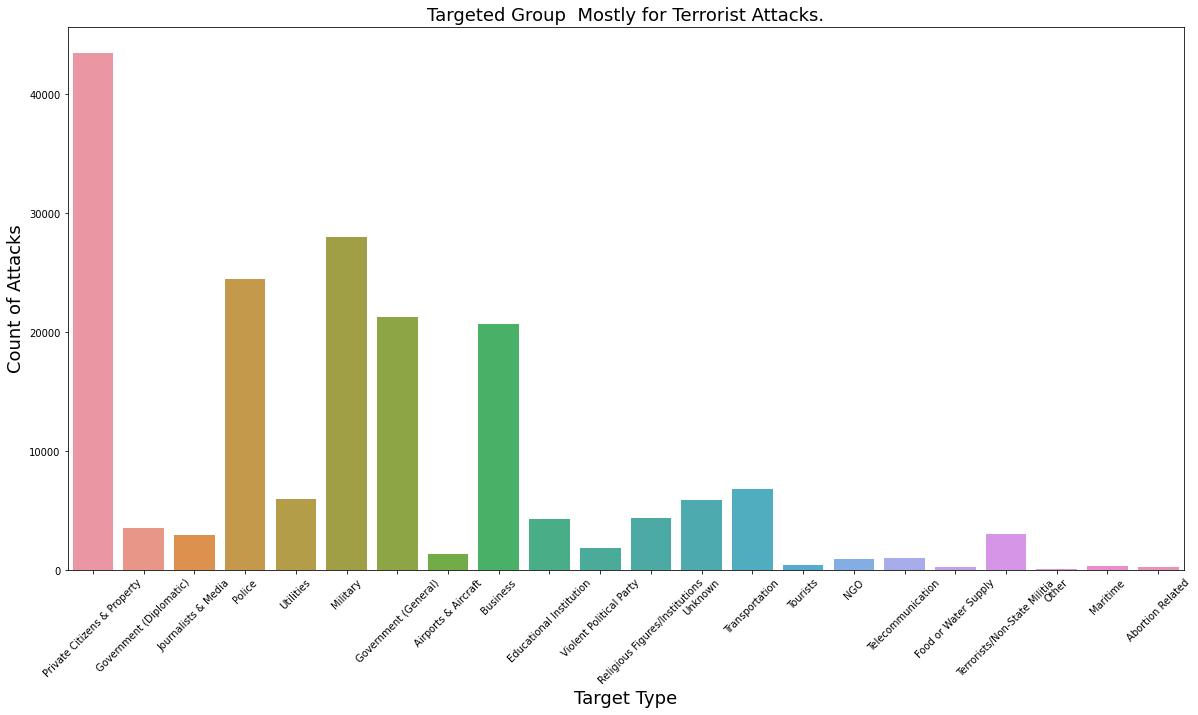

In [ ]:
#Targeted Group  Mostly for Terrorist Attacks.


plt.figure(figsize=(20,10))
sns.countplot(data['Target Type'])

plt.title("Targeted Group  Mostly for Terrorist Attacks.",fontsize='18')
plt.xlabel("Target Type",fontsize='18')
plt.ylabel("Count of Attacks",fontsize='18')
plt.xticks(rotation='45')
plt.show()

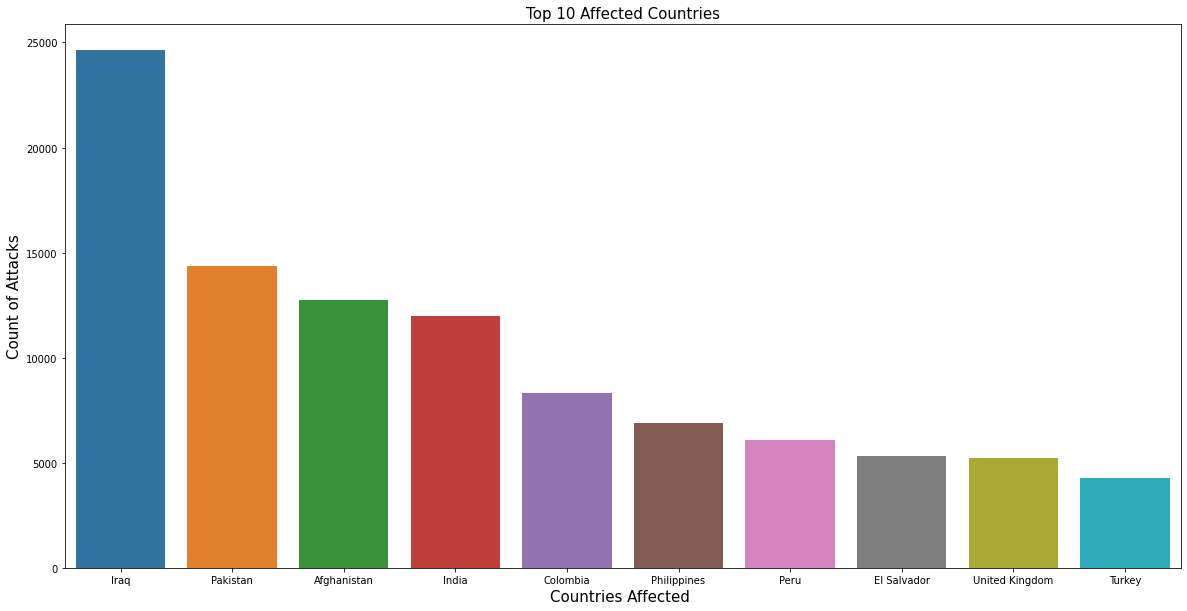

In [ ]:
#Affected Top 10 Countries:

plt.figure(figsize=(20,10))
sns.barplot(data['Country'].value_counts()[:10].index,
            data['Country'].value_counts()[:10].values)
plt.title("Top 10 Affected Countries",fontsize=15)
plt.xlabel('Countries Affected ',fontsize=15)
plt.ylabel("Count of Attacks",fontsize=15)
plt.show()

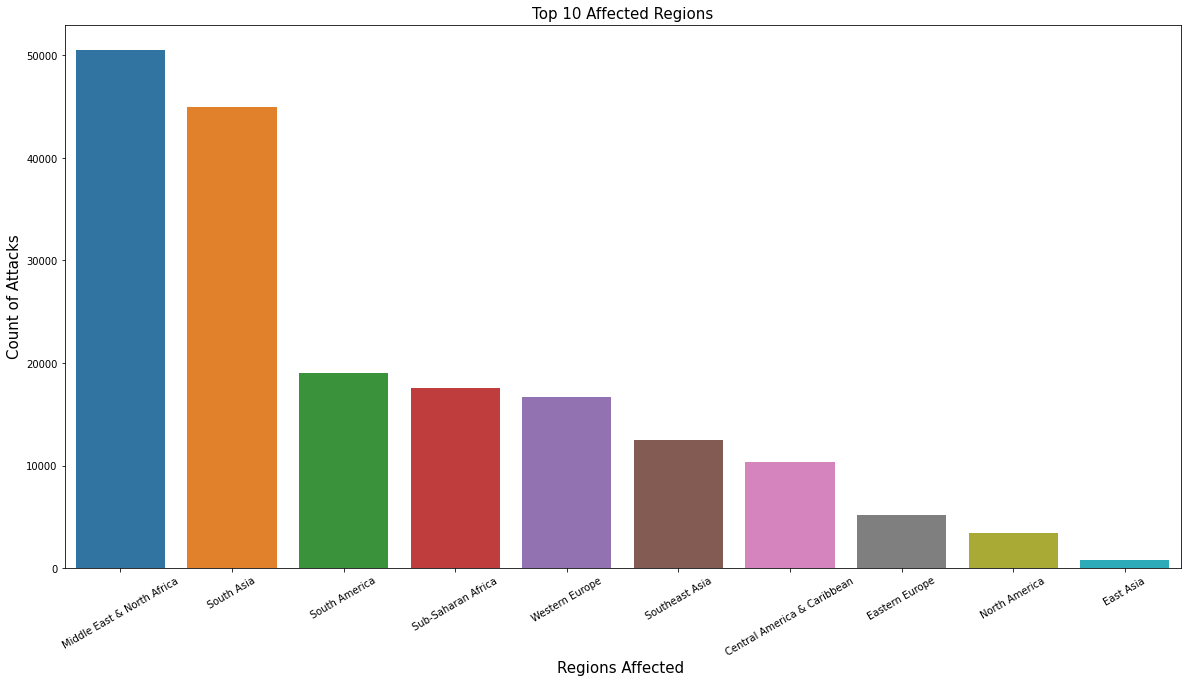

In [ ]:
#Affected Top 10 Region:

plt.figure(figsize=(20,10))
sns.barplot(data['Region'].value_counts()[:10].index,
            data['Region'].value_counts()[:10].values)
plt.title("Top 10 Affected Regions",fontsize=15)
plt.xlabel('Regions Affected ',fontsize=15)
plt.ylabel("Count of Attacks",fontsize=15)
plt.xticks(rotation=30)
plt.show()

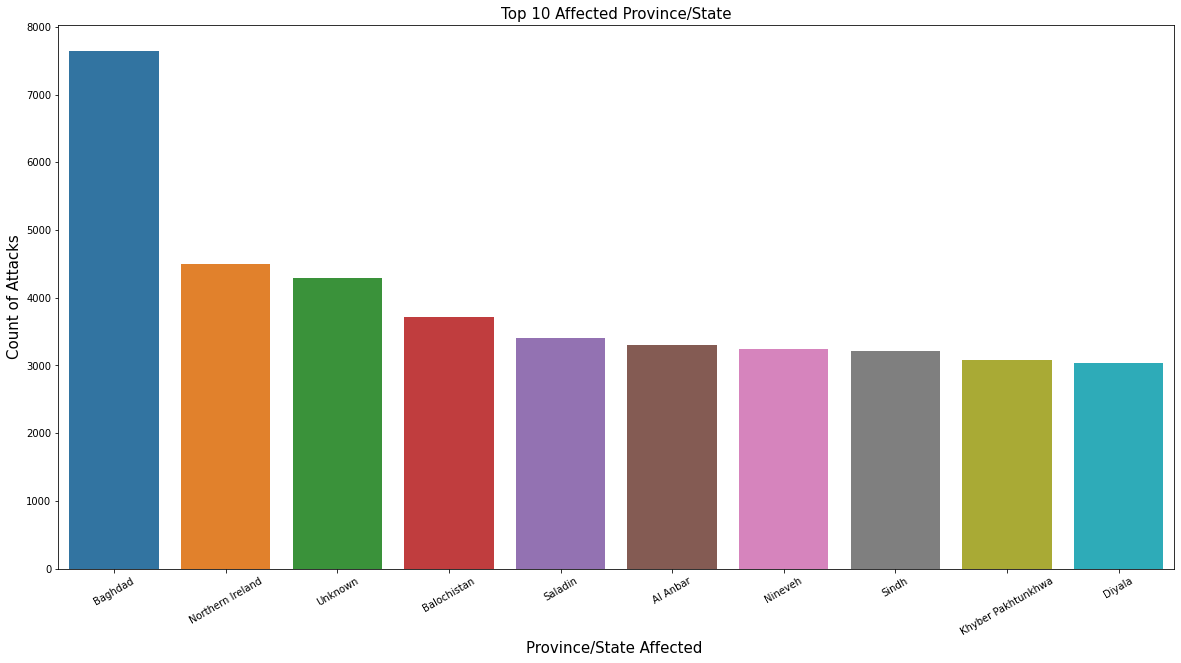

In [ ]:
#Affected Top 10 Province/State:

plt.figure(figsize=(20,10))
sns.barplot(data['Province/State'].value_counts()[:10].index,
            data['Province/State'].value_counts()[:10].values)
plt.title("Top 10 Affected Province/State",fontsize=15)
plt.xlabel('Province/State Affected ',fontsize=15)
plt.ylabel("Count of Attacks",fontsize=15)
plt.xticks(rotation=30)
plt.show()

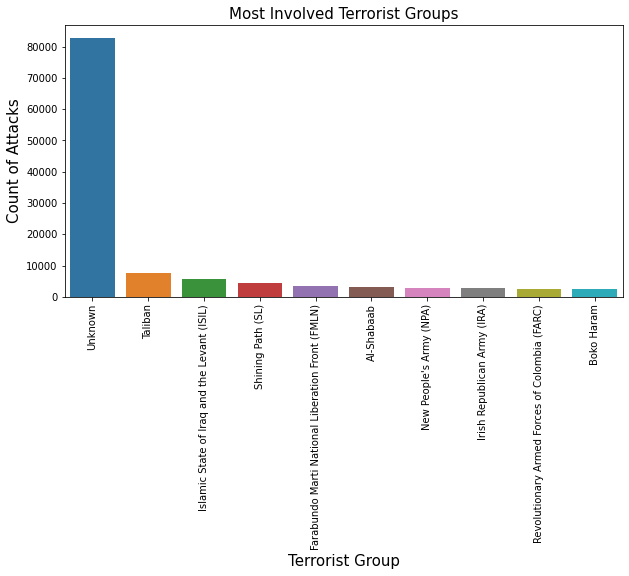

In [ ]:
# TOP 10 Terrorist group name.
plt.figure(figsize=(10,5))
sns.barplot(data['Group Name'].value_counts()[:10].index,
            data['Group Name'].value_counts()[:10].values)

plt.title("Most Involved Terrorist Groups",fontsize=15)
plt.xlabel("Terrorist Group",fontsize=15)
plt.ylabel("Count of Attacks",fontsize=15)
plt.xticks(rotation=90,fontsize=10)
plt.show()

In [ ]:
india=data[data['Country']=='India']['Province/State']
india.value_counts()

Jammu and Kashmir    2454
Assam                1151
Manipur              1100
Chhattisgarh          979
Punjab                949
Jharkhand             887
Bihar                 688
West Bengal           650
Odisha                428
Maharashtra           302
Meghalaya             294
Andhra Pradesh        251
Orissa                221
Delhi                 208
Uttar Pradesh         201
Tamil Nadu            164
Unknown               157
Tripura               117
Nagaland              115
Kerala                 98
Gujarat                85
Madhya Pradesh         75
Karnataka              71
Haryana                50
Chandigarh             47
Rajasthan              43
Andhra pradesh         41
Mizoram                27
Uttaranchal            24
Himachal Pradesh       24
Arunachal Pradesh      24
Telangana              24
Goa                     5
Sikkim                  4
Puducherry              2
Name: Province/State, dtype: int64

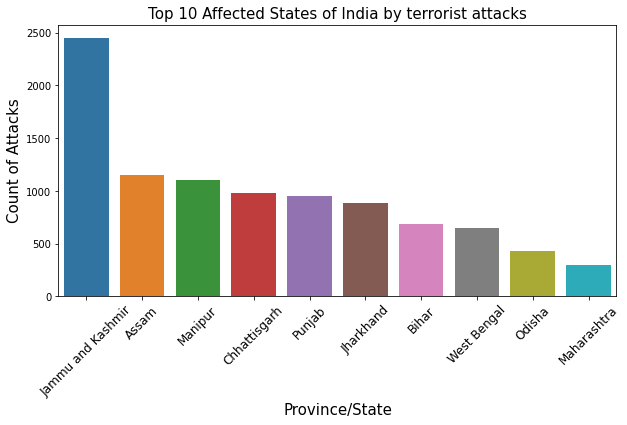

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(india.value_counts()[:10].index,
            india.value_counts()[:10].values)

plt.title("Top 10 Affected States of India by terrorist attacks",fontsize=15)
plt.xlabel("Province/State",fontsize=15)
plt.ylabel("Count of Attacks",fontsize=15)
plt.xticks(rotation=45,fontsize=12)

plt.show()

# Analyze the Number of PEOPLE GOT KILLED,GOT WOUNDED AND CASUALTIES HAPPENED.

In [ ]:
#We grouped the dataset on 2 factors killed and year.
year_killed=data[["Year","Killed"]].groupby("Year").sum()   
year_killed.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


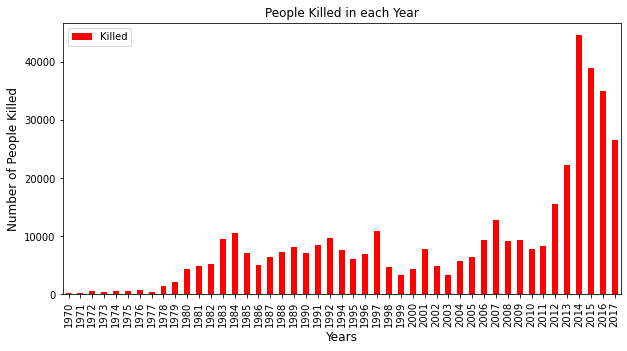

In [ ]:
year_killed.plot(kind="bar",color="red",figsize=(10,5))
plt.title("People Killed in each Year")
plt.xlabel("Years",fontsize=12)
plt.ylabel("Number of People Killed",fontsize=12) 
plt.show()

In [ ]:
region_wounded=data[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
region_wounded

,Wounded
Region,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


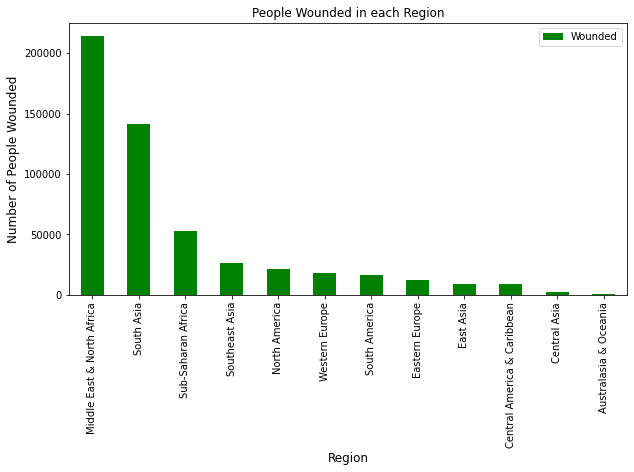

In [ ]:
region_wounded.plot(kind="bar",color="green",figsize=(10,5))
plt.title("People Wounded in each Region")
plt.xlabel("Region",fontsize=12)
plt.ylabel("Number of People Wounded",fontsize=12) 
plt.show()

In [ ]:
country_wounded=data[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False)
country_wounded.head(10)

,Wounded
Country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
Sri Lanka,15561.0
Syria,14109.0
Philippines,13367.0
Lebanon,10904.0


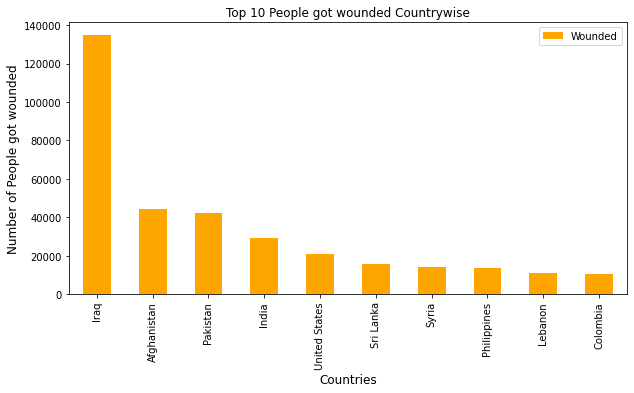

In [ ]:
country_wounded[:10].plot(kind="bar",color="orange",figsize=(10,5))
plt.title("Top 10 People got wounded Countrywise")
plt.xlabel("Countries",fontsize=12)
plt.ylabel("Number of People got wounded",fontsize=12) 
plt.show()

In [ ]:
city_wounded=data[["City","Wounded"]].groupby("City").sum().sort_values(by="Wounded",ascending=False)
city_wounded.head(10)

,Wounded
City,
Baghdad,56725.0
New York City,16781.0
Unknown,12803.0
Kabul,5973.0
Mosul,5787.0
Karachi,5688.0
Tokyo,5542.0
Beirut,5341.0
Nairobi,5024.0


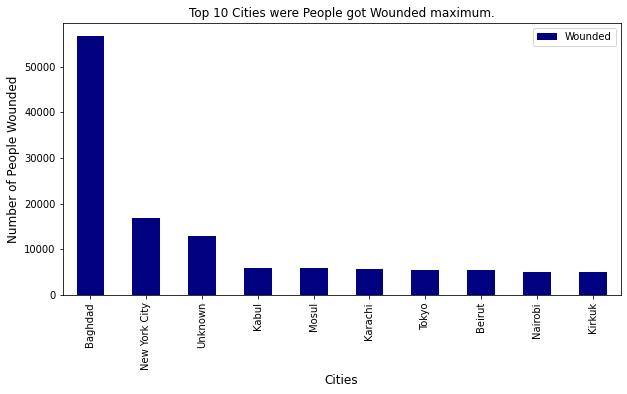

In [ ]:
city_wounded[:10].plot(kind="bar",color="navy",figsize=(10,5))
plt.title("Top 10 Cities were People got Wounded maximum.")
plt.xlabel("Cities",fontsize=12)
plt.ylabel("Number of People Wounded",fontsize=12) 
plt.show()

In [ ]:
group_wounded=data[["Group Name","Wounded"]].groupby("Group Name").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
group_wounded.head(10)

,Wounded
Group Name,
Islamic State of Iraq and the Levant (ISIL),30672.0
Taliban,27932.0
Al-Qaida,24512.0
Liberation Tigers of Tamil Eelam (LTTE),11031.0
Al-Qaida in Iraq,10343.0
Tehrik-i-Taliban Pakistan (TTP),9532.0
Boko Haram,9473.0
Al-Shabaab,7624.0
Aum Shinri Kyo,6003.0


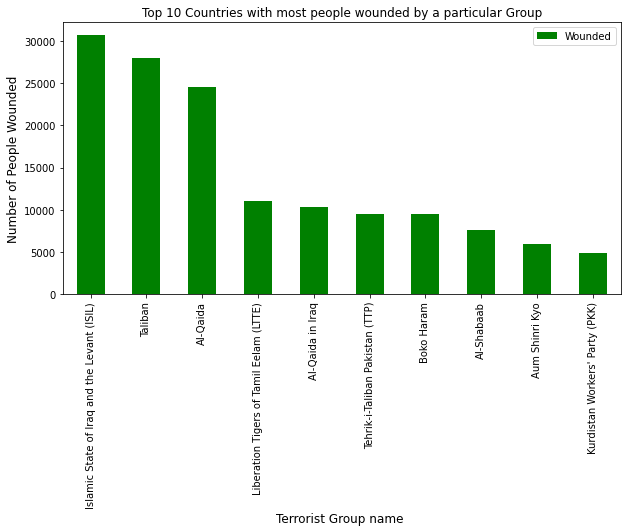

In [ ]:
group_wounded[:10].plot(kind="bar",color="green",figsize=(10,5))
plt.title("Top 10 Countries with most people wounded by a particular Group")
plt.xlabel("Terrorist Group name ",fontsize=12)
plt.ylabel("Number of People Wounded",fontsize=12) 
plt.show()

In [ ]:
attack_wounded=data[["Attack Type","Wounded"]].groupby("Attack Type").sum().sort_values(by="Wounded",ascending=False)
attack_wounded

,Wounded
Attack Type,
Bombing/Explosion,372686.0
Armed Assault,77366.0
Hijacking,17001.0
Unknown,14725.0
Unarmed Assault,14027.0
Assassination,13887.0
Hostage Taking (Kidnapping),6446.0
Hostage Taking (Barricade Incident),3966.0
Facility/Infrastructure Attack,3765.0


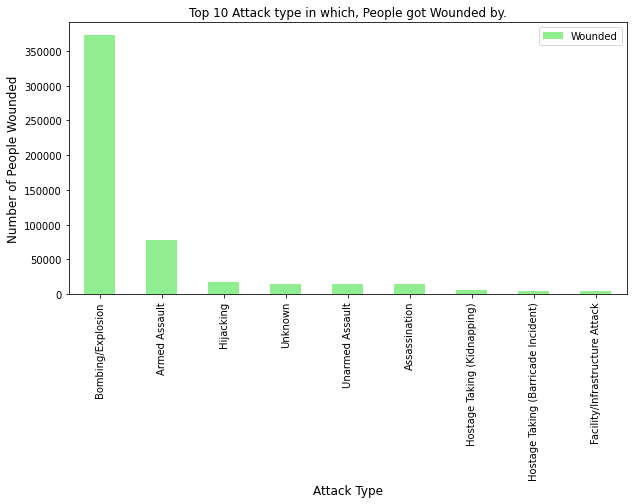

In [ ]:
attack_wounded[:10].plot(kind="bar",color="lightgreen",figsize=(10,5))    
plt.title("Top 10 Attack type in which, People got Wounded by.")
plt.xlabel("Attack Type",fontsize=12)
plt.ylabel("Number of People Wounded",fontsize=12) 
plt.show()

In [ ]:
target_wounded=data[["Target Type","Wounded"]].groupby("Target Type").sum().sort_values(by="Wounded",ascending=False)
target_wounded

,Wounded
Target Type,
Private Citizens & Property,178672.0
Military,71038.0
Police,64703.0
Business,54531.0
Government (General),41184.0
Transportation,40679.0
Religious Figures/Institutions,24477.0
Government (Diplomatic),10359.0
Educational Institution,10227.0


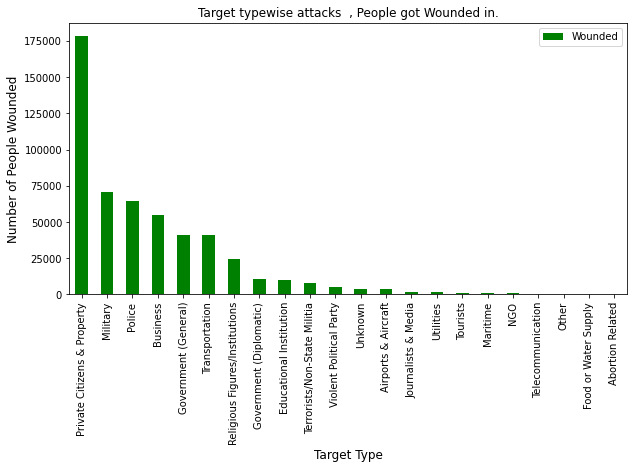

In [ ]:
target_wounded.plot(kind="bar",color="green",figsize=(10,5))    
plt.title("Target typewise attacks  , People got Wounded in.")
plt.xlabel("Target Type",fontsize=12)
plt.ylabel("Number of People Wounded",fontsize=12) 
plt.show()

In [ ]:
gc_wounded=data[["Group Name","Country","Wounded"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)
gc_wounded

,,Wounded
Group Name,Country,
Taliban,Afghanistan,27871.0
Islamic State of Iraq and the Levant (ISIL),Iraq,23697.0
Al-Qaida,United States,16493.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10991.0
Al-Qaida in Iraq,Iraq,10075.0
Tehrik-i-Taliban Pakistan (TTP),Pakistan,9518.0
Boko Haram,Nigeria,7671.0
Al-Shabaab,Somalia,6025.0
Aum Shinri Kyo,Japan,6003.0


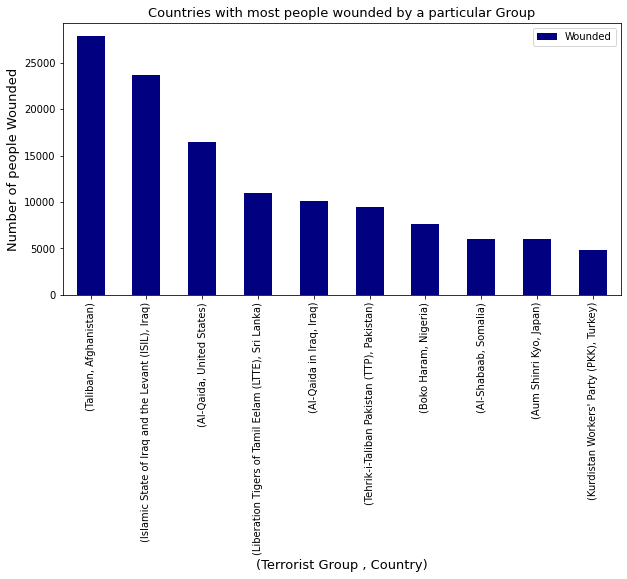

In [ ]:
gc_wounded.plot(kind="bar",color="navy",figsize=(10,5))                         
plt.title("Countries with most people wounded by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group , Country)",fontsize=13)
plt.xticks(fontsize=10)
plt.ylabel("Number of people Wounded",fontsize=13)     #Comes in a kind of pair.Terrorist Group ,Country
plt.show()

In [ ]:
wound=data.loc[:,"Wounded"].sum()
print("Total number of people Wounded due to Terrorist Attacks from 1970 to 2017 across the world :\n",wound)

Total number of people Wounded due to Terrorist Attacks from 1970 to 2017 across the world :
 523869.0


In [ ]:
casualities=data.loc[:,"Casualty happen"].sum()
print("Total number of Casualty happen due to Terrorist Attacks from 1970 to 2017 across the world :\n",casualities)


Total number of Casualty happen due to Terrorist Attacks from 1970 to 2017 across the world :
 935737.0


# **Summary**

Total number of people Wounded due to Terrorist Attacks from 1970 to 2017 across the world :
# *523869*


Total number of Casualty happen due to Terrorist Attacks from 1970 to 2017 across the world :
# *935737*